In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# from keras.utils.np_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
# flat the input data
X_train = X_train.reshape(*X_train.shape, 1) / 255.    # normalize
X_test = X_test.reshape(*X_test.shape, 1) / 255.      # normalize

# one-hot output data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)    # model.fit_generator can fit the model using flow,
                        # this datagen is not flow yet, 
                        # it just need to fit the data first to -> 
                        # get some of its functionality working.
                        # the actual generator flow is like:
                        # datagen.flow(X_train, y_train, batch_size=batch_size)

In [4]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


model.summary()
# plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [5]:
# compile

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])



In [ ]:
# fit

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Fit the model
batch_size = 86

# steps_per_epoch is necessary for model.fit_generator()
hist = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs = 30, 
                    validation_data = (X_test,y_test),
                    steps_per_epoch=X_train.shape[0] // batch_size, 
                    callbacks=[learning_rate_reduction])

Epoch 1/30
697/697 [==============================] - 20s 22ms/step - loss: 0.6336 - accuracy: 0.7896 - val_loss: 0.0488 - val_accuracy: 0.9837
Epoch 2/30
697/697 [==============================] - 10s 14ms/step - loss: 0.1115 - accuracy: 0.9671 - val_loss: 0.0341 - val_accuracy: 0.9886
Epoch 3/30
697/697 [==============================] - 10s 14ms/step - loss: 0.0824 - accuracy: 0.9757 - val_loss: 0.0168 - val_accuracy: 0.9944
Epoch 4/30
697/697 [==============================] - 10s 14ms/step - loss: 0.0676 - accuracy: 0.9796 - val_loss: 0.0172 - val_accuracy: 0.9944
Epoch 5/30
697/697 [==============================] - 10s 14ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.0179 - val_accuracy: 0.9944
Epoch 6/30
697/697 [==============================] - 10s 14ms/step - loss: 0.0623 - accuracy: 0.9835 - val_loss: 0.0187 - val_accuracy: 0.9944

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/30
697/697 [==============================] - 1

In [ ]:
plt.plot(hist.history["loss"])

In [ ]:
results = model.predict(X_test)

In [9]:
model.save("cnn_mnist.ckpt.h5")

# examples

cats and dogg

In [2]:
import os
PROJECT_FOLDER = os.path.join(os.path.dirname(os.getcwd()), "storage")
os.chdir(PROJECT_FOLDER)
print(os.getcwd())

D:\PyProjects\Machine-Learning-Tech\storage


In [3]:
train_path = os.path.join("dogs-vs-cats(smaller)", "train")
valid_path = os.path.join("dogs-vs-cats(smaller)", "valid")
test_path  = os.path.join("dogs-vs-cats(smaller)", "test")

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                        target_size=(224, 224),
                                                        classes=["dogs", "cats"], 
                                                         # define which is 0, 1
                                                         
                                                        batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                        target_size=(224, 224),
                                                        classes=["dogs", "cats"],
                                                        batch_size=4)

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                        target_size=(224, 224),
                                                        classes=["dogs", "cats"],
                                                        batch_size=10)

Found 506 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


-- model --

In [35]:
model = Sequential([
    Conv2D(32, 
           kernel_size=(3,3), 
           strides=(1,1),  # default
           padding="same", # default is "valid", which means no padding
           input_shape=(224, 224, 3), 
           activation="relu"),
    Flatten(),
    Dense(2, activation="softmax")
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
flatten_4 (Flatten)          (None, 1605632)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 3211266   
Total params: 3,212,162
Trainable params: 3,212,162
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(Adam(lr=.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"]
             )

model.fit_generator(train_batches,
                    epochs=12,
                    steps_per_epoch=4,
                    
                    validation_data=valid_batches,
                    validation_steps=4)

Epoch 1/12
4/4 [==============================] - 1s 297ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/12
4/4 [==============================] - 1s 191ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 3/12
4/4 [==============================] - 1s 190ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/12
4/4 [==============================] - 1s 192ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 5/12
4/4 [==============================] - 1s 189ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/12
4/4 [==============================] - 1s 190ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 7/12
4/4 [==============================] - 1s 189ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 8/12
4/4 [==============================] - 1s 178ms/

evaluate by prediction

In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

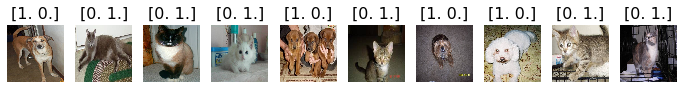

In [31]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

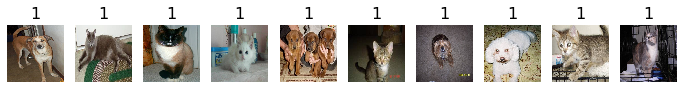

In [32]:
predictions = model.predict_classes(test_imgs, verbose=0)
# predictions = np.array([to_categorical(p, 2) for p in predictions])

plots(test_imgs, titles=predictions)

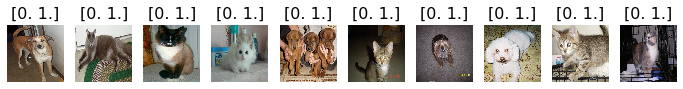

In [33]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

# print(predictions)
plots(test_imgs, titles=predictions)

others

In [ ]:
train_batchs.class_indices